# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux/Reacher.x86_64')
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_v1/Reacher.x86_64')
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_OneAgent/Reacher_Linux/Reacher.x86_64')
# # env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis/Reacher.x86_64')
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis_OneAgent/Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.2199999950826168


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# Testing the train mode
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
state = env_info.vector_observations[0]                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    action = np.random.randn(num_agents, action_size) # select an action (for each agent)
    #print(action)
    action = np.clip(action, -1, 1)                  # all actions between -1 and 1
    #print(action)
    env_info = env.step(action)[brain_name]           # send all actions to tne environment
    next_state = env_info.vector_observations[0]         # get next state (for each agent)
    reward = env_info.rewards[0]                         # get reward (for each agent)
    done = env_info.local_done[0]                        # see if episode finished
    #scores += env_info.rewards                         # update the score (for each agent)
    state = next_state                               # roll over states to next time step
    if done is True:                                  # exit loop if episode finished
        #print(action.shape, reward)
        #print(done)
        break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

## Option 1: Solve the First Version
The task is episodic, and in order to solve the environment, your agent must get an average score of +30 over 100 consecutive episodes.

In [8]:
# Only to test if GPUs are available!
import tensorflow as tf
print('TensorFlow Version: {}'.format(tf.__version__))
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [10]:
brain.vector_observation_space_size, brain.vector_action_space_size, \
brain.vector_action_space_type, brain.vector_observation_space_type

(33, 4, 'continuous', 'continuous')

In [13]:
# env = gym.make('BipedalWalker-v2')
# env.seed(10)
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
agent = Agent(state_size=33, action_size=4, random_seed=10)

In [14]:
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
total_reward_deque = deque(maxlen=100)
episode_total_rewards = []
for ep in range(11111):
    #state = env.reset()
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    state = env_info.vector_observations[0]                  # get the current state (for each agent)
    agent.reset()
    total_reward = 0
    while True:
        action = agent.act(state)
        #next_state, reward, done, _ = env.step(action)
        env_info = env.step(action)[brain_name]           # send all actions to tne environment
        next_state = env_info.vector_observations[0]         # get next state (for each agent)
        reward = env_info.rewards[0]                         # get reward (for each agent)
        done = env_info.local_done[0]                        # see if episode finished
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            break 
    total_reward_deque.append(total_reward)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(total_reward_deque))) 
    episode_total_rewards.append([ep, np.mean(total_reward_deque)])
    if np.mean(total_reward_deque) >= 30:
        break
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

/home/arasdar/miniconda3/envs/env/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 0	Average Score: 0.30
Episode 1	Average Score: 0.15
Episode 2	Average Score: 0.10
Episode 3	Average Score: 0.07
Episode 4	Average Score: 0.06
Episode 5	Average Score: 0.09
Episode 6	Average Score: 0.19
Episode 7	Average Score: 0.19
Episode 8	Average Score: 0.28
Episode 9	Average Score: 0.26
Episode 10	Average Score: 0.39
Episode 11	Average Score: 0.40
Episode 12	Average Score: 0.46
Episode 13	Average Score: 0.45
Episode 14	Average Score: 0.48
Episode 15	Average Score: 0.54
Episode 16	Average Score: 0.51
Episode 17	Average Score: 0.52
Episode 18	Average Score: 0.49
Episode 19	Average Score: 0.52
Episode 20	Average Score: 0.53
Episode 21	Average Score: 0.56
Episode 22	Average Score: 0.55
Episode 23	Average Score: 0.56
Episode 24	Average Score: 0.59
Episode 25	Average Score: 0.62
Episode 26	Average Score: 0.60
Episode 27	Average Score: 0.67
Episode 28	Average Score: 0.67
Episode 29	Average Score: 0.68
Episode 30	Average Score: 0.73
Episode 31	Average Score: 0.79
Episode 32	Average

Episode 260	Average Score: 7.45
Episode 261	Average Score: 7.39
Episode 262	Average Score: 7.44
Episode 263	Average Score: 7.47
Episode 264	Average Score: 7.52
Episode 265	Average Score: 7.52
Episode 266	Average Score: 7.49
Episode 267	Average Score: 7.52
Episode 268	Average Score: 7.51
Episode 269	Average Score: 7.52
Episode 270	Average Score: 7.55
Episode 271	Average Score: 7.62
Episode 272	Average Score: 7.61
Episode 273	Average Score: 7.73
Episode 274	Average Score: 7.99
Episode 275	Average Score: 8.03
Episode 276	Average Score: 8.12
Episode 277	Average Score: 8.11
Episode 278	Average Score: 8.13
Episode 279	Average Score: 8.13
Episode 280	Average Score: 8.18
Episode 281	Average Score: 8.12
Episode 282	Average Score: 8.08
Episode 283	Average Score: 8.09
Episode 284	Average Score: 8.13
Episode 285	Average Score: 8.16
Episode 286	Average Score: 8.17
Episode 287	Average Score: 8.19
Episode 288	Average Score: 8.18
Episode 289	Average Score: 8.27
Episode 290	Average Score: 8.27
Episode 

Episode 512	Average Score: 12.25
Episode 513	Average Score: 12.25
Episode 514	Average Score: 12.23
Episode 515	Average Score: 12.07
Episode 516	Average Score: 12.09
Episode 517	Average Score: 11.94
Episode 518	Average Score: 11.91
Episode 519	Average Score: 11.92
Episode 520	Average Score: 11.85
Episode 521	Average Score: 11.80
Episode 522	Average Score: 11.78
Episode 523	Average Score: 11.83
Episode 524	Average Score: 11.91
Episode 525	Average Score: 12.01
Episode 526	Average Score: 12.06
Episode 527	Average Score: 12.11
Episode 528	Average Score: 12.15
Episode 529	Average Score: 12.16
Episode 530	Average Score: 12.23
Episode 531	Average Score: 12.31
Episode 532	Average Score: 12.18
Episode 533	Average Score: 12.23
Episode 534	Average Score: 12.29
Episode 535	Average Score: 12.29
Episode 536	Average Score: 12.20
Episode 537	Average Score: 12.22
Episode 538	Average Score: 12.28
Episode 539	Average Score: 12.27
Episode 540	Average Score: 12.28
Episode 541	Average Score: 12.28
Episode 54

Episode 761	Average Score: 17.05
Episode 762	Average Score: 17.07
Episode 763	Average Score: 16.95
Episode 764	Average Score: 16.95
Episode 765	Average Score: 16.83
Episode 766	Average Score: 16.74
Episode 767	Average Score: 16.76
Episode 768	Average Score: 16.73
Episode 769	Average Score: 16.79
Episode 770	Average Score: 16.74
Episode 771	Average Score: 16.85
Episode 772	Average Score: 16.93
Episode 773	Average Score: 17.01
Episode 774	Average Score: 17.03
Episode 775	Average Score: 17.01
Episode 776	Average Score: 17.03
Episode 777	Average Score: 17.01
Episode 778	Average Score: 17.05
Episode 779	Average Score: 17.05
Episode 780	Average Score: 17.04
Episode 781	Average Score: 16.98
Episode 782	Average Score: 16.99
Episode 783	Average Score: 17.10
Episode 784	Average Score: 17.15
Episode 785	Average Score: 17.17
Episode 786	Average Score: 17.24
Episode 787	Average Score: 17.35
Episode 788	Average Score: 17.38
Episode 789	Average Score: 17.41
Episode 790	Average Score: 17.40
Episode 79

Episode 1009	Average Score: 17.20
Episode 1010	Average Score: 17.22
Episode 1011	Average Score: 17.24
Episode 1012	Average Score: 17.21
Episode 1013	Average Score: 17.23
Episode 1014	Average Score: 17.21
Episode 1015	Average Score: 17.20
Episode 1016	Average Score: 17.25
Episode 1017	Average Score: 17.25
Episode 1018	Average Score: 17.21
Episode 1019	Average Score: 17.18
Episode 1020	Average Score: 17.17
Episode 1021	Average Score: 17.12
Episode 1022	Average Score: 17.14
Episode 1023	Average Score: 17.17
Episode 1024	Average Score: 17.11
Episode 1025	Average Score: 17.13
Episode 1026	Average Score: 17.19
Episode 1027	Average Score: 17.20
Episode 1028	Average Score: 17.20
Episode 1029	Average Score: 17.24
Episode 1030	Average Score: 17.34
Episode 1031	Average Score: 17.38
Episode 1032	Average Score: 17.52
Episode 1033	Average Score: 17.50
Episode 1034	Average Score: 17.38
Episode 1035	Average Score: 17.47
Episode 1036	Average Score: 17.52
Episode 1037	Average Score: 17.54
Episode 1038	A

Episode 1250	Average Score: 18.65
Episode 1251	Average Score: 18.91
Episode 1252	Average Score: 18.93
Episode 1253	Average Score: 18.93
Episode 1254	Average Score: 19.13
Episode 1255	Average Score: 19.21
Episode 1256	Average Score: 19.35
Episode 1257	Average Score: 19.48
Episode 1258	Average Score: 19.50
Episode 1259	Average Score: 19.65
Episode 1260	Average Score: 19.76
Episode 1261	Average Score: 19.88
Episode 1262	Average Score: 19.93
Episode 1263	Average Score: 19.90
Episode 1264	Average Score: 19.95
Episode 1265	Average Score: 19.89
Episode 1266	Average Score: 19.90
Episode 1267	Average Score: 20.06
Episode 1268	Average Score: 20.07
Episode 1269	Average Score: 20.07
Episode 1270	Average Score: 20.11
Episode 1271	Average Score: 20.15
Episode 1272	Average Score: 20.14
Episode 1273	Average Score: 20.10
Episode 1274	Average Score: 20.08
Episode 1275	Average Score: 20.09
Episode 1276	Average Score: 20.14
Episode 1277	Average Score: 20.09
Episode 1278	Average Score: 19.97
Episode 1279	A

Episode 1491	Average Score: 19.68
Episode 1492	Average Score: 19.89
Episode 1493	Average Score: 20.00
Episode 1494	Average Score: 20.07
Episode 1495	Average Score: 20.18
Episode 1496	Average Score: 20.13
Episode 1497	Average Score: 20.04
Episode 1498	Average Score: 20.18
Episode 1499	Average Score: 20.15
Episode 1500	Average Score: 20.17
Episode 1501	Average Score: 20.21
Episode 1502	Average Score: 20.05
Episode 1503	Average Score: 19.96
Episode 1504	Average Score: 19.98
Episode 1505	Average Score: 19.93
Episode 1506	Average Score: 19.84
Episode 1507	Average Score: 19.88
Episode 1508	Average Score: 19.88
Episode 1509	Average Score: 19.80
Episode 1510	Average Score: 20.04
Episode 1511	Average Score: 20.13
Episode 1512	Average Score: 20.03
Episode 1513	Average Score: 20.10
Episode 1514	Average Score: 20.23
Episode 1515	Average Score: 20.21
Episode 1516	Average Score: 20.18
Episode 1517	Average Score: 20.15
Episode 1518	Average Score: 20.06
Episode 1519	Average Score: 20.05
Episode 1520	A

Episode 1732	Average Score: 20.71
Episode 1733	Average Score: 20.78
Episode 1734	Average Score: 20.63
Episode 1735	Average Score: 20.67
Episode 1736	Average Score: 20.84
Episode 1737	Average Score: 20.67
Episode 1738	Average Score: 20.70
Episode 1739	Average Score: 20.73
Episode 1740	Average Score: 20.41
Episode 1741	Average Score: 20.56
Episode 1742	Average Score: 20.28
Episode 1743	Average Score: 20.27
Episode 1744	Average Score: 20.33
Episode 1745	Average Score: 20.34
Episode 1746	Average Score: 20.13
Episode 1747	Average Score: 19.98
Episode 1748	Average Score: 19.82
Episode 1749	Average Score: 19.70
Episode 1750	Average Score: 19.49
Episode 1751	Average Score: 19.27
Episode 1752	Average Score: 19.10
Episode 1753	Average Score: 19.16
Episode 1754	Average Score: 19.02
Episode 1755	Average Score: 18.95
Episode 1756	Average Score: 18.93
Episode 1757	Average Score: 18.87
Episode 1758	Average Score: 18.76
Episode 1759	Average Score: 18.71
Episode 1760	Average Score: 18.44
Episode 1761	A

Episode 1976	Average Score: 13.65
Episode 1977	Average Score: 13.63
Episode 1978	Average Score: 13.59
Episode 1979	Average Score: 13.68
Episode 1980	Average Score: 13.84
Episode 1981	Average Score: 13.86
Episode 1982	Average Score: 14.08
Episode 1983	Average Score: 14.29
Episode 1984	Average Score: 14.29
Episode 1985	Average Score: 14.32
Episode 1986	Average Score: 14.46
Episode 1987	Average Score: 14.52
Episode 1988	Average Score: 14.52
Episode 1989	Average Score: 14.49
Episode 1990	Average Score: 14.56
Episode 1991	Average Score: 14.63
Episode 1992	Average Score: 14.68
Episode 1993	Average Score: 14.58
Episode 1994	Average Score: 14.55
Episode 1995	Average Score: 14.61
Episode 1996	Average Score: 14.61
Episode 1997	Average Score: 14.77
Episode 1998	Average Score: 14.79
Episode 1999	Average Score: 14.92
Episode 2000	Average Score: 14.96
Episode 2001	Average Score: 15.04
Episode 2002	Average Score: 15.14
Episode 2003	Average Score: 15.21
Episode 2004	Average Score: 15.25
Episode 2005	A

Episode 2221	Average Score: 4.40
Episode 2222	Average Score: 4.47
Episode 2223	Average Score: 4.49
Episode 2224	Average Score: 4.54
Episode 2225	Average Score: 4.51
Episode 2226	Average Score: 4.50
Episode 2227	Average Score: 4.54
Episode 2228	Average Score: 4.55
Episode 2229	Average Score: 4.59
Episode 2230	Average Score: 4.57
Episode 2231	Average Score: 4.61
Episode 2232	Average Score: 4.62
Episode 2233	Average Score: 4.61
Episode 2234	Average Score: 4.59
Episode 2235	Average Score: 4.56
Episode 2236	Average Score: 4.39
Episode 2237	Average Score: 4.36
Episode 2238	Average Score: 4.36
Episode 2239	Average Score: 4.34
Episode 2240	Average Score: 4.34
Episode 2241	Average Score: 4.34
Episode 2242	Average Score: 4.33
Episode 2243	Average Score: 4.35
Episode 2244	Average Score: 4.35
Episode 2245	Average Score: 4.38
Episode 2246	Average Score: 4.38
Episode 2247	Average Score: 4.39
Episode 2248	Average Score: 4.34
Episode 2249	Average Score: 4.33
Episode 2250	Average Score: 4.31
Episode 22

Episode 2470	Average Score: 6.03
Episode 2471	Average Score: 6.04
Episode 2472	Average Score: 6.15
Episode 2473	Average Score: 6.15
Episode 2474	Average Score: 6.27
Episode 2475	Average Score: 6.18
Episode 2476	Average Score: 6.21
Episode 2477	Average Score: 6.15
Episode 2478	Average Score: 6.11
Episode 2479	Average Score: 6.00
Episode 2480	Average Score: 6.06
Episode 2481	Average Score: 6.11
Episode 2482	Average Score: 6.10
Episode 2483	Average Score: 6.10
Episode 2484	Average Score: 6.17
Episode 2485	Average Score: 6.11
Episode 2486	Average Score: 6.04
Episode 2487	Average Score: 6.05
Episode 2488	Average Score: 6.06
Episode 2489	Average Score: 6.11
Episode 2490	Average Score: 6.08
Episode 2491	Average Score: 6.04
Episode 2492	Average Score: 6.01
Episode 2493	Average Score: 6.01
Episode 2494	Average Score: 6.02
Episode 2495	Average Score: 6.06
Episode 2496	Average Score: 6.06
Episode 2497	Average Score: 6.01
Episode 2498	Average Score: 5.99
Episode 2499	Average Score: 5.98
Episode 25

Episode 2719	Average Score: 2.05
Episode 2720	Average Score: 2.05
Episode 2721	Average Score: 2.05
Episode 2722	Average Score: 2.02
Episode 2723	Average Score: 2.04
Episode 2724	Average Score: 2.01
Episode 2725	Average Score: 2.02
Episode 2726	Average Score: 1.99
Episode 2727	Average Score: 2.00
Episode 2728	Average Score: 1.99
Episode 2729	Average Score: 1.99
Episode 2730	Average Score: 2.03
Episode 2731	Average Score: 2.05
Episode 2732	Average Score: 2.03
Episode 2733	Average Score: 2.04
Episode 2734	Average Score: 2.04
Episode 2735	Average Score: 2.06
Episode 2736	Average Score: 2.04
Episode 2737	Average Score: 2.07
Episode 2738	Average Score: 2.08
Episode 2739	Average Score: 2.04
Episode 2740	Average Score: 2.03
Episode 2741	Average Score: 2.04
Episode 2742	Average Score: 2.02
Episode 2743	Average Score: 2.03
Episode 2744	Average Score: 2.04
Episode 2745	Average Score: 2.09
Episode 2746	Average Score: 2.10
Episode 2747	Average Score: 2.04
Episode 2748	Average Score: 2.08
Episode 27

Episode 2968	Average Score: 2.56
Episode 2969	Average Score: 2.58
Episode 2970	Average Score: 2.56
Episode 2971	Average Score: 2.55
Episode 2972	Average Score: 2.55
Episode 2973	Average Score: 2.54
Episode 2974	Average Score: 2.56
Episode 2975	Average Score: 2.54
Episode 2976	Average Score: 2.54
Episode 2977	Average Score: 2.52
Episode 2978	Average Score: 2.55
Episode 2979	Average Score: 2.51
Episode 2980	Average Score: 2.52
Episode 2981	Average Score: 2.51
Episode 2982	Average Score: 2.52
Episode 2983	Average Score: 2.53
Episode 2984	Average Score: 2.45
Episode 2985	Average Score: 2.46
Episode 2986	Average Score: 2.48
Episode 2987	Average Score: 2.50
Episode 2988	Average Score: 2.44
Episode 2989	Average Score: 2.41
Episode 2990	Average Score: 2.37
Episode 2991	Average Score: 2.37
Episode 2992	Average Score: 2.39
Episode 2993	Average Score: 2.32
Episode 2994	Average Score: 2.31
Episode 2995	Average Score: 2.28
Episode 2996	Average Score: 2.25
Episode 2997	Average Score: 2.28
Episode 29

Episode 3217	Average Score: 2.47
Episode 3218	Average Score: 2.46
Episode 3219	Average Score: 2.43
Episode 3220	Average Score: 2.37
Episode 3221	Average Score: 2.31
Episode 3222	Average Score: 2.33
Episode 3223	Average Score: 2.33
Episode 3224	Average Score: 2.31
Episode 3225	Average Score: 2.40
Episode 3226	Average Score: 2.41
Episode 3227	Average Score: 2.41
Episode 3228	Average Score: 2.44
Episode 3229	Average Score: 2.46
Episode 3230	Average Score: 2.46
Episode 3231	Average Score: 2.46
Episode 3232	Average Score: 2.45
Episode 3233	Average Score: 2.46
Episode 3234	Average Score: 2.42
Episode 3235	Average Score: 2.44
Episode 3236	Average Score: 2.47
Episode 3237	Average Score: 2.49
Episode 3238	Average Score: 2.53
Episode 3239	Average Score: 2.52
Episode 3240	Average Score: 2.51
Episode 3241	Average Score: 2.48
Episode 3242	Average Score: 2.50
Episode 3243	Average Score: 2.49
Episode 3244	Average Score: 2.48
Episode 3245	Average Score: 2.52
Episode 3246	Average Score: 2.52
Episode 32

Episode 3466	Average Score: 2.75
Episode 3467	Average Score: 2.82
Episode 3468	Average Score: 2.82
Episode 3469	Average Score: 2.81
Episode 3470	Average Score: 2.82
Episode 3471	Average Score: 2.84
Episode 3472	Average Score: 2.82
Episode 3473	Average Score: 2.84
Episode 3474	Average Score: 2.80
Episode 3475	Average Score: 2.81
Episode 3476	Average Score: 2.80
Episode 3477	Average Score: 2.81
Episode 3478	Average Score: 2.82
Episode 3479	Average Score: 2.82
Episode 3480	Average Score: 2.81
Episode 3481	Average Score: 2.86
Episode 3482	Average Score: 2.86
Episode 3483	Average Score: 2.84
Episode 3484	Average Score: 2.82
Episode 3485	Average Score: 2.82
Episode 3486	Average Score: 2.80
Episode 3487	Average Score: 2.81
Episode 3488	Average Score: 2.79
Episode 3489	Average Score: 2.77
Episode 3490	Average Score: 2.77
Episode 3491	Average Score: 2.75
Episode 3492	Average Score: 2.73
Episode 3493	Average Score: 2.74
Episode 3494	Average Score: 2.72
Episode 3495	Average Score: 2.73
Episode 34

Episode 3715	Average Score: 2.62
Episode 3716	Average Score: 2.62
Episode 3717	Average Score: 2.62
Episode 3718	Average Score: 2.57
Episode 3719	Average Score: 2.58
Episode 3720	Average Score: 2.59
Episode 3721	Average Score: 2.57
Episode 3722	Average Score: 2.57
Episode 3723	Average Score: 2.56
Episode 3724	Average Score: 2.54
Episode 3725	Average Score: 2.54
Episode 3726	Average Score: 2.55
Episode 3727	Average Score: 2.55
Episode 3728	Average Score: 2.54
Episode 3729	Average Score: 2.52
Episode 3730	Average Score: 2.52
Episode 3731	Average Score: 2.47
Episode 3732	Average Score: 2.44
Episode 3733	Average Score: 2.44
Episode 3734	Average Score: 2.44
Episode 3735	Average Score: 2.41
Episode 3736	Average Score: 2.44
Episode 3737	Average Score: 2.44
Episode 3738	Average Score: 2.44
Episode 3739	Average Score: 2.45
Episode 3740	Average Score: 2.46
Episode 3741	Average Score: 2.44
Episode 3742	Average Score: 2.46
Episode 3743	Average Score: 2.42
Episode 3744	Average Score: 2.41
Episode 37

Episode 3964	Average Score: 1.59
Episode 3965	Average Score: 1.58
Episode 3966	Average Score: 1.56
Episode 3967	Average Score: 1.56
Episode 3968	Average Score: 1.56
Episode 3969	Average Score: 1.54
Episode 3970	Average Score: 1.55
Episode 3971	Average Score: 1.55
Episode 3972	Average Score: 1.53
Episode 3973	Average Score: 1.52
Episode 3974	Average Score: 1.51
Episode 3975	Average Score: 1.49
Episode 3976	Average Score: 1.49
Episode 3977	Average Score: 1.50
Episode 3978	Average Score: 1.49
Episode 3979	Average Score: 1.48
Episode 3980	Average Score: 1.47
Episode 3981	Average Score: 1.46
Episode 3982	Average Score: 1.44
Episode 3983	Average Score: 1.46
Episode 3984	Average Score: 1.48
Episode 3985	Average Score: 1.47
Episode 3986	Average Score: 1.48
Episode 3987	Average Score: 1.48
Episode 3988	Average Score: 1.46
Episode 3989	Average Score: 1.48
Episode 3990	Average Score: 1.52
Episode 3991	Average Score: 1.52
Episode 3992	Average Score: 1.51
Episode 3993	Average Score: 1.53
Episode 39

Episode 4213	Average Score: 1.93
Episode 4214	Average Score: 1.92
Episode 4215	Average Score: 1.90
Episode 4216	Average Score: 1.90
Episode 4217	Average Score: 1.90
Episode 4218	Average Score: 1.90
Episode 4219	Average Score: 1.90
Episode 4220	Average Score: 1.88
Episode 4221	Average Score: 1.89
Episode 4222	Average Score: 1.88
Episode 4223	Average Score: 1.85
Episode 4224	Average Score: 1.84
Episode 4225	Average Score: 1.83
Episode 4226	Average Score: 1.81
Episode 4227	Average Score: 1.83
Episode 4228	Average Score: 1.81
Episode 4229	Average Score: 1.83
Episode 4230	Average Score: 1.82
Episode 4231	Average Score: 1.82
Episode 4232	Average Score: 1.82
Episode 4233	Average Score: 1.83
Episode 4234	Average Score: 1.81
Episode 4235	Average Score: 1.83
Episode 4236	Average Score: 1.83
Episode 4237	Average Score: 1.83
Episode 4238	Average Score: 1.82
Episode 4239	Average Score: 1.80
Episode 4240	Average Score: 1.84
Episode 4241	Average Score: 1.85
Episode 4242	Average Score: 1.85
Episode 42

Episode 4462	Average Score: 2.24
Episode 4463	Average Score: 2.25
Episode 4464	Average Score: 2.22
Episode 4465	Average Score: 2.22
Episode 4466	Average Score: 2.25
Episode 4467	Average Score: 2.24
Episode 4468	Average Score: 2.23
Episode 4469	Average Score: 2.26
Episode 4470	Average Score: 2.25
Episode 4471	Average Score: 2.25
Episode 4472	Average Score: 2.23
Episode 4473	Average Score: 2.26
Episode 4474	Average Score: 2.26
Episode 4475	Average Score: 2.26
Episode 4476	Average Score: 2.30
Episode 4477	Average Score: 2.30
Episode 4478	Average Score: 2.32
Episode 4479	Average Score: 2.32
Episode 4480	Average Score: 2.34
Episode 4481	Average Score: 2.33
Episode 4482	Average Score: 2.34
Episode 4483	Average Score: 2.36
Episode 4484	Average Score: 2.36
Episode 4485	Average Score: 2.35
Episode 4486	Average Score: 2.35
Episode 4487	Average Score: 2.36
Episode 4488	Average Score: 2.41
Episode 4489	Average Score: 2.42
Episode 4490	Average Score: 2.42
Episode 4491	Average Score: 2.42
Episode 44

Episode 4711	Average Score: 3.08
Episode 4712	Average Score: 3.12
Episode 4713	Average Score: 3.09
Episode 4714	Average Score: 3.09
Episode 4715	Average Score: 3.08
Episode 4716	Average Score: 3.05
Episode 4717	Average Score: 3.03
Episode 4718	Average Score: 3.05
Episode 4719	Average Score: 3.07
Episode 4720	Average Score: 3.05
Episode 4721	Average Score: 3.04
Episode 4722	Average Score: 3.05
Episode 4723	Average Score: 3.04
Episode 4724	Average Score: 3.04
Episode 4725	Average Score: 3.04
Episode 4726	Average Score: 3.04
Episode 4727	Average Score: 3.12
Episode 4728	Average Score: 3.14
Episode 4729	Average Score: 3.15
Episode 4730	Average Score: 3.17
Episode 4731	Average Score: 3.16
Episode 4732	Average Score: 3.17
Episode 4733	Average Score: 3.13
Episode 4734	Average Score: 3.12
Episode 4735	Average Score: 3.12
Episode 4736	Average Score: 3.14
Episode 4737	Average Score: 3.13
Episode 4738	Average Score: 3.10
Episode 4739	Average Score: 3.10
Episode 4740	Average Score: 3.12
Episode 47

Episode 4960	Average Score: 2.71
Episode 4961	Average Score: 2.73
Episode 4962	Average Score: 2.76
Episode 4963	Average Score: 2.74
Episode 4964	Average Score: 2.74
Episode 4965	Average Score: 2.80
Episode 4966	Average Score: 2.76
Episode 4967	Average Score: 2.77
Episode 4968	Average Score: 2.79
Episode 4969	Average Score: 2.79
Episode 4970	Average Score: 2.77
Episode 4971	Average Score: 2.76
Episode 4972	Average Score: 2.74
Episode 4973	Average Score: 2.75
Episode 4974	Average Score: 2.74
Episode 4975	Average Score: 2.73
Episode 4976	Average Score: 2.71
Episode 4977	Average Score: 2.70
Episode 4978	Average Score: 2.68
Episode 4979	Average Score: 2.74
Episode 4980	Average Score: 2.72
Episode 4981	Average Score: 2.69
Episode 4982	Average Score: 2.66
Episode 4983	Average Score: 2.68
Episode 4984	Average Score: 2.75
Episode 4985	Average Score: 2.85
Episode 4986	Average Score: 2.85
Episode 4987	Average Score: 2.86
Episode 4988	Average Score: 2.85
Episode 4989	Average Score: 2.85
Episode 49

Episode 5209	Average Score: 2.18
Episode 5210	Average Score: 2.17
Episode 5211	Average Score: 2.18
Episode 5212	Average Score: 2.20
Episode 5213	Average Score: 2.22
Episode 5214	Average Score: 2.25
Episode 5215	Average Score: 2.28
Episode 5216	Average Score: 2.29
Episode 5217	Average Score: 2.25
Episode 5218	Average Score: 2.25
Episode 5219	Average Score: 2.25
Episode 5220	Average Score: 2.31
Episode 5221	Average Score: 2.33
Episode 5222	Average Score: 2.36
Episode 5223	Average Score: 2.39
Episode 5224	Average Score: 2.41
Episode 5225	Average Score: 2.41
Episode 5226	Average Score: 2.41
Episode 5227	Average Score: 2.41
Episode 5228	Average Score: 2.42
Episode 5229	Average Score: 2.41
Episode 5230	Average Score: 2.40
Episode 5231	Average Score: 2.41
Episode 5232	Average Score: 2.42
Episode 5233	Average Score: 2.43
Episode 5234	Average Score: 2.47
Episode 5235	Average Score: 2.51
Episode 5236	Average Score: 2.53
Episode 5237	Average Score: 2.53
Episode 5238	Average Score: 2.51
Episode 52

Episode 5458	Average Score: 4.28
Episode 5459	Average Score: 4.34
Episode 5460	Average Score: 4.38
Episode 5461	Average Score: 4.46
Episode 5462	Average Score: 4.49
Episode 5463	Average Score: 4.45
Episode 5464	Average Score: 4.45
Episode 5465	Average Score: 4.45
Episode 5466	Average Score: 4.46
Episode 5467	Average Score: 4.43
Episode 5468	Average Score: 4.44
Episode 5469	Average Score: 4.42
Episode 5470	Average Score: 4.43
Episode 5471	Average Score: 4.43
Episode 5472	Average Score: 4.43
Episode 5473	Average Score: 4.43
Episode 5474	Average Score: 4.43
Episode 5475	Average Score: 4.40
Episode 5476	Average Score: 4.40
Episode 5477	Average Score: 4.40
Episode 5478	Average Score: 4.37
Episode 5479	Average Score: 4.40
Episode 5480	Average Score: 4.42
Episode 5481	Average Score: 4.42
Episode 5482	Average Score: 4.36
Episode 5483	Average Score: 4.29
Episode 5484	Average Score: 4.25
Episode 5485	Average Score: 4.24
Episode 5486	Average Score: 4.22
Episode 5487	Average Score: 4.24
Episode 54

Episode 5707	Average Score: 4.62
Episode 5708	Average Score: 4.62
Episode 5709	Average Score: 4.64
Episode 5710	Average Score: 4.64
Episode 5711	Average Score: 4.64
Episode 5712	Average Score: 4.60
Episode 5713	Average Score: 4.62
Episode 5714	Average Score: 4.58
Episode 5715	Average Score: 4.58
Episode 5716	Average Score: 4.69
Episode 5717	Average Score: 4.66
Episode 5718	Average Score: 4.67
Episode 5719	Average Score: 4.67
Episode 5720	Average Score: 4.71
Episode 5721	Average Score: 4.72
Episode 5722	Average Score: 4.68
Episode 5723	Average Score: 4.65
Episode 5724	Average Score: 4.66
Episode 5725	Average Score: 4.57
Episode 5726	Average Score: 4.56
Episode 5727	Average Score: 4.50
Episode 5728	Average Score: 4.53
Episode 5729	Average Score: 4.54
Episode 5730	Average Score: 4.58
Episode 5731	Average Score: 4.58
Episode 5732	Average Score: 4.60
Episode 5733	Average Score: 4.62
Episode 5734	Average Score: 4.68
Episode 5735	Average Score: 4.72
Episode 5736	Average Score: 4.77
Episode 57

Episode 5956	Average Score: 5.45
Episode 5957	Average Score: 5.47
Episode 5958	Average Score: 5.44
Episode 5959	Average Score: 5.46
Episode 5960	Average Score: 5.49
Episode 5961	Average Score: 5.34
Episode 5962	Average Score: 5.37
Episode 5963	Average Score: 5.40
Episode 5964	Average Score: 5.42
Episode 5965	Average Score: 5.45
Episode 5966	Average Score: 5.46
Episode 5967	Average Score: 5.50
Episode 5968	Average Score: 5.47
Episode 5969	Average Score: 5.54
Episode 5970	Average Score: 5.62
Episode 5971	Average Score: 5.64
Episode 5972	Average Score: 5.66
Episode 5973	Average Score: 5.70
Episode 5974	Average Score: 5.76
Episode 5975	Average Score: 5.72
Episode 5976	Average Score: 5.75
Episode 5977	Average Score: 5.80
Episode 5978	Average Score: 5.80
Episode 5979	Average Score: 5.76
Episode 5980	Average Score: 5.78
Episode 5981	Average Score: 5.74
Episode 5982	Average Score: 5.69
Episode 5983	Average Score: 5.63
Episode 5984	Average Score: 5.60
Episode 5985	Average Score: 5.59
Episode 59

Episode 6205	Average Score: 7.18
Episode 6206	Average Score: 7.16
Episode 6207	Average Score: 7.16
Episode 6208	Average Score: 7.22
Episode 6209	Average Score: 7.23
Episode 6210	Average Score: 7.23
Episode 6211	Average Score: 7.15
Episode 6212	Average Score: 7.13
Episode 6213	Average Score: 7.21
Episode 6214	Average Score: 7.16
Episode 6215	Average Score: 7.22
Episode 6216	Average Score: 7.19
Episode 6217	Average Score: 7.21
Episode 6218	Average Score: 7.27
Episode 6219	Average Score: 7.28
Episode 6220	Average Score: 7.27
Episode 6221	Average Score: 7.31
Episode 6222	Average Score: 7.30
Episode 6223	Average Score: 7.35
Episode 6224	Average Score: 7.35
Episode 6225	Average Score: 7.34
Episode 6226	Average Score: 7.31
Episode 6227	Average Score: 7.30
Episode 6228	Average Score: 7.28
Episode 6229	Average Score: 7.24
Episode 6230	Average Score: 7.26
Episode 6231	Average Score: 7.29
Episode 6232	Average Score: 7.29
Episode 6233	Average Score: 7.32
Episode 6234	Average Score: 7.35
Episode 62

Episode 6454	Average Score: 7.78
Episode 6455	Average Score: 7.77
Episode 6456	Average Score: 7.79
Episode 6457	Average Score: 7.79
Episode 6458	Average Score: 7.76
Episode 6459	Average Score: 7.76
Episode 6460	Average Score: 7.83
Episode 6461	Average Score: 7.85
Episode 6462	Average Score: 7.89
Episode 6463	Average Score: 7.86
Episode 6464	Average Score: 7.90
Episode 6465	Average Score: 7.85
Episode 6466	Average Score: 7.77
Episode 6467	Average Score: 7.79
Episode 6468	Average Score: 7.88
Episode 6469	Average Score: 7.89
Episode 6470	Average Score: 7.91
Episode 6471	Average Score: 7.99
Episode 6472	Average Score: 8.05
Episode 6473	Average Score: 8.04
Episode 6474	Average Score: 8.00
Episode 6475	Average Score: 7.93
Episode 6476	Average Score: 7.98
Episode 6477	Average Score: 8.00
Episode 6478	Average Score: 8.03
Episode 6479	Average Score: 8.25
Episode 6480	Average Score: 8.28
Episode 6481	Average Score: 8.28
Episode 6482	Average Score: 8.26
Episode 6483	Average Score: 8.24
Episode 64

Episode 6703	Average Score: 6.75
Episode 6704	Average Score: 6.72
Episode 6705	Average Score: 6.80
Episode 6706	Average Score: 6.85
Episode 6707	Average Score: 6.94
Episode 6708	Average Score: 6.96
Episode 6709	Average Score: 6.85
Episode 6710	Average Score: 6.85
Episode 6711	Average Score: 6.89
Episode 6712	Average Score: 6.92
Episode 6713	Average Score: 6.88
Episode 6714	Average Score: 6.80
Episode 6715	Average Score: 6.88
Episode 6716	Average Score: 7.00
Episode 6717	Average Score: 6.94
Episode 6718	Average Score: 6.97
Episode 6719	Average Score: 6.96
Episode 6720	Average Score: 6.88
Episode 6721	Average Score: 6.79
Episode 6722	Average Score: 6.80
Episode 6723	Average Score: 6.81
Episode 6724	Average Score: 6.84
Episode 6725	Average Score: 6.83
Episode 6726	Average Score: 6.89
Episode 6727	Average Score: 6.77
Episode 6728	Average Score: 6.72
Episode 6729	Average Score: 6.80
Episode 6730	Average Score: 6.82
Episode 6731	Average Score: 6.81
Episode 6732	Average Score: 6.84
Episode 67

Episode 6952	Average Score: 6.56
Episode 6953	Average Score: 6.49
Episode 6954	Average Score: 6.56
Episode 6955	Average Score: 6.52
Episode 6956	Average Score: 6.48
Episode 6957	Average Score: 6.53
Episode 6958	Average Score: 6.54
Episode 6959	Average Score: 6.60
Episode 6960	Average Score: 6.59
Episode 6961	Average Score: 6.53
Episode 6962	Average Score: 6.52
Episode 6963	Average Score: 6.49
Episode 6964	Average Score: 6.53
Episode 6965	Average Score: 6.49
Episode 6966	Average Score: 6.53
Episode 6967	Average Score: 6.54
Episode 6968	Average Score: 6.55
Episode 6969	Average Score: 6.58
Episode 6970	Average Score: 6.60
Episode 6971	Average Score: 6.68
Episode 6972	Average Score: 6.65
Episode 6973	Average Score: 6.62
Episode 6974	Average Score: 6.60
Episode 6975	Average Score: 6.57
Episode 6976	Average Score: 6.55
Episode 6977	Average Score: 6.56
Episode 6978	Average Score: 6.53
Episode 6979	Average Score: 6.49
Episode 6980	Average Score: 6.46
Episode 6981	Average Score: 6.47
Episode 69

Episode 7201	Average Score: 6.78
Episode 7202	Average Score: 6.69
Episode 7203	Average Score: 6.70
Episode 7204	Average Score: 6.66
Episode 7205	Average Score: 6.57
Episode 7206	Average Score: 6.52
Episode 7207	Average Score: 6.47
Episode 7208	Average Score: 6.41
Episode 7209	Average Score: 6.30
Episode 7210	Average Score: 6.27
Episode 7211	Average Score: 6.27
Episode 7212	Average Score: 6.21
Episode 7213	Average Score: 6.07
Episode 7214	Average Score: 5.98
Episode 7215	Average Score: 5.90
Episode 7216	Average Score: 5.87
Episode 7217	Average Score: 5.87
Episode 7218	Average Score: 5.80
Episode 7219	Average Score: 5.71
Episode 7220	Average Score: 5.65
Episode 7221	Average Score: 5.53
Episode 7222	Average Score: 5.48
Episode 7223	Average Score: 5.38
Episode 7224	Average Score: 5.27
Episode 7225	Average Score: 5.14
Episode 7226	Average Score: 5.00
Episode 7227	Average Score: 4.94
Episode 7228	Average Score: 4.85
Episode 7229	Average Score: 4.80
Episode 7230	Average Score: 4.75
Episode 72

Episode 7450	Average Score: 1.21
Episode 7451	Average Score: 1.21
Episode 7452	Average Score: 1.21
Episode 7453	Average Score: 1.22
Episode 7454	Average Score: 1.24
Episode 7455	Average Score: 1.25
Episode 7456	Average Score: 1.25
Episode 7457	Average Score: 1.24
Episode 7458	Average Score: 1.23
Episode 7459	Average Score: 1.24
Episode 7460	Average Score: 1.24
Episode 7461	Average Score: 1.25
Episode 7462	Average Score: 1.27
Episode 7463	Average Score: 1.26
Episode 7464	Average Score: 1.25
Episode 7465	Average Score: 1.26
Episode 7466	Average Score: 1.24
Episode 7467	Average Score: 1.24
Episode 7468	Average Score: 1.25
Episode 7469	Average Score: 1.25
Episode 7470	Average Score: 1.25
Episode 7471	Average Score: 1.26
Episode 7472	Average Score: 1.27
Episode 7473	Average Score: 1.29
Episode 7474	Average Score: 1.28
Episode 7475	Average Score: 1.28
Episode 7476	Average Score: 1.28
Episode 7477	Average Score: 1.29
Episode 7478	Average Score: 1.29
Episode 7479	Average Score: 1.29
Episode 74

Episode 7699	Average Score: 2.27
Episode 7700	Average Score: 2.26
Episode 7701	Average Score: 2.29
Episode 7702	Average Score: 2.29
Episode 7703	Average Score: 2.31
Episode 7704	Average Score: 2.30
Episode 7705	Average Score: 2.30
Episode 7706	Average Score: 2.33
Episode 7707	Average Score: 2.32
Episode 7708	Average Score: 2.36
Episode 7709	Average Score: 2.37
Episode 7710	Average Score: 2.39
Episode 7711	Average Score: 2.39
Episode 7712	Average Score: 2.37
Episode 7713	Average Score: 2.37
Episode 7714	Average Score: 2.31
Episode 7715	Average Score: 2.29
Episode 7716	Average Score: 2.31
Episode 7717	Average Score: 2.31
Episode 7718	Average Score: 2.30
Episode 7719	Average Score: 2.28
Episode 7720	Average Score: 2.27
Episode 7721	Average Score: 2.26
Episode 7722	Average Score: 2.24
Episode 7723	Average Score: 2.25
Episode 7724	Average Score: 2.25
Episode 7725	Average Score: 2.25
Episode 7726	Average Score: 2.26
Episode 7727	Average Score: 2.27
Episode 7728	Average Score: 2.26
Episode 77

Episode 7948	Average Score: 4.21
Episode 7949	Average Score: 4.24
Episode 7950	Average Score: 4.21
Episode 7951	Average Score: 4.19
Episode 7952	Average Score: 4.27
Episode 7953	Average Score: 4.30
Episode 7954	Average Score: 4.30
Episode 7955	Average Score: 4.28
Episode 7956	Average Score: 4.34
Episode 7957	Average Score: 4.32
Episode 7958	Average Score: 4.37
Episode 7959	Average Score: 4.37
Episode 7960	Average Score: 4.38
Episode 7961	Average Score: 4.40
Episode 7962	Average Score: 4.45
Episode 7963	Average Score: 4.54
Episode 7964	Average Score: 4.51
Episode 7965	Average Score: 4.54
Episode 7966	Average Score: 4.55
Episode 7967	Average Score: 4.56
Episode 7968	Average Score: 4.56
Episode 7969	Average Score: 4.57
Episode 7970	Average Score: 4.59
Episode 7971	Average Score: 4.50
Episode 7972	Average Score: 4.50
Episode 7973	Average Score: 4.54
Episode 7974	Average Score: 4.54
Episode 7975	Average Score: 4.61
Episode 7976	Average Score: 4.71
Episode 7977	Average Score: 4.77
Episode 79

Episode 8197	Average Score: 5.01
Episode 8198	Average Score: 4.94
Episode 8199	Average Score: 4.92
Episode 8200	Average Score: 4.85
Episode 8201	Average Score: 4.91
Episode 8202	Average Score: 4.88
Episode 8203	Average Score: 4.87
Episode 8204	Average Score: 4.77
Episode 8205	Average Score: 4.71
Episode 8206	Average Score: 4.66
Episode 8207	Average Score: 4.68
Episode 8208	Average Score: 4.69
Episode 8209	Average Score: 4.74
Episode 8210	Average Score: 4.68
Episode 8211	Average Score: 4.66
Episode 8212	Average Score: 4.64
Episode 8213	Average Score: 4.65
Episode 8214	Average Score: 4.66
Episode 8215	Average Score: 4.65
Episode 8216	Average Score: 4.62
Episode 8217	Average Score: 4.59
Episode 8218	Average Score: 4.50
Episode 8219	Average Score: 4.46
Episode 8220	Average Score: 4.44
Episode 8221	Average Score: 4.42
Episode 8222	Average Score: 4.42
Episode 8223	Average Score: 4.39
Episode 8224	Average Score: 4.41
Episode 8225	Average Score: 4.44
Episode 8226	Average Score: 4.52
Episode 82

Episode 8446	Average Score: 6.25
Episode 8447	Average Score: 6.26
Episode 8448	Average Score: 6.30
Episode 8449	Average Score: 6.32
Episode 8450	Average Score: 6.30
Episode 8451	Average Score: 6.29
Episode 8452	Average Score: 6.31
Episode 8453	Average Score: 6.30
Episode 8454	Average Score: 6.32
Episode 8455	Average Score: 6.34
Episode 8456	Average Score: 6.26
Episode 8457	Average Score: 6.29
Episode 8458	Average Score: 6.29
Episode 8459	Average Score: 6.23
Episode 8460	Average Score: 6.22
Episode 8461	Average Score: 6.19
Episode 8462	Average Score: 6.17
Episode 8463	Average Score: 6.16
Episode 8464	Average Score: 6.17
Episode 8465	Average Score: 6.14
Episode 8466	Average Score: 6.17
Episode 8467	Average Score: 6.13
Episode 8468	Average Score: 6.09
Episode 8469	Average Score: 6.08
Episode 8470	Average Score: 6.00
Episode 8471	Average Score: 6.04
Episode 8472	Average Score: 6.01
Episode 8473	Average Score: 6.05
Episode 8474	Average Score: 5.95
Episode 8475	Average Score: 5.96
Episode 84

Episode 8695	Average Score: 7.73
Episode 8696	Average Score: 7.81
Episode 8697	Average Score: 7.87
Episode 8698	Average Score: 7.85
Episode 8699	Average Score: 7.85
Episode 8700	Average Score: 7.72
Episode 8701	Average Score: 7.73
Episode 8702	Average Score: 7.68
Episode 8703	Average Score: 7.70
Episode 8704	Average Score: 7.68
Episode 8705	Average Score: 7.72
Episode 8706	Average Score: 7.74
Episode 8707	Average Score: 7.73
Episode 8708	Average Score: 7.70
Episode 8709	Average Score: 7.69
Episode 8710	Average Score: 7.71
Episode 8711	Average Score: 7.73
Episode 8712	Average Score: 7.70
Episode 8713	Average Score: 7.72
Episode 8714	Average Score: 7.76
Episode 8715	Average Score: 7.70
Episode 8716	Average Score: 7.78
Episode 8717	Average Score: 7.86
Episode 8718	Average Score: 7.87
Episode 8719	Average Score: 7.95
Episode 8720	Average Score: 8.01
Episode 8721	Average Score: 8.04
Episode 8722	Average Score: 8.19
Episode 8723	Average Score: 8.22
Episode 8724	Average Score: 8.32
Episode 87

Episode 8944	Average Score: 6.53
Episode 8945	Average Score: 6.52
Episode 8946	Average Score: 6.54
Episode 8947	Average Score: 6.59
Episode 8948	Average Score: 6.59
Episode 8949	Average Score: 6.53
Episode 8950	Average Score: 6.46
Episode 8951	Average Score: 6.42
Episode 8952	Average Score: 6.41
Episode 8953	Average Score: 6.31
Episode 8954	Average Score: 6.21
Episode 8955	Average Score: 6.22
Episode 8956	Average Score: 6.20
Episode 8957	Average Score: 6.31
Episode 8958	Average Score: 6.31
Episode 8959	Average Score: 6.31
Episode 8960	Average Score: 6.41
Episode 8961	Average Score: 6.46
Episode 8962	Average Score: 6.52
Episode 8963	Average Score: 6.46
Episode 8964	Average Score: 6.49
Episode 8965	Average Score: 6.37
Episode 8966	Average Score: 6.47
Episode 8967	Average Score: 6.49
Episode 8968	Average Score: 6.53
Episode 8969	Average Score: 6.50
Episode 8970	Average Score: 6.43
Episode 8971	Average Score: 6.47
Episode 8972	Average Score: 6.49
Episode 8973	Average Score: 6.51
Episode 89

Episode 9193	Average Score: 6.44
Episode 9194	Average Score: 6.39
Episode 9195	Average Score: 6.39
Episode 9196	Average Score: 6.45
Episode 9197	Average Score: 6.37
Episode 9198	Average Score: 6.38
Episode 9199	Average Score: 6.39
Episode 9200	Average Score: 6.37
Episode 9201	Average Score: 6.37
Episode 9202	Average Score: 6.39
Episode 9203	Average Score: 6.42
Episode 9204	Average Score: 6.41
Episode 9205	Average Score: 6.38
Episode 9206	Average Score: 6.35
Episode 9207	Average Score: 6.32
Episode 9208	Average Score: 6.30
Episode 9209	Average Score: 6.27
Episode 9210	Average Score: 6.28
Episode 9211	Average Score: 6.20
Episode 9212	Average Score: 6.20
Episode 9213	Average Score: 6.24
Episode 9214	Average Score: 6.22
Episode 9215	Average Score: 6.24
Episode 9216	Average Score: 6.17
Episode 9217	Average Score: 6.33
Episode 9218	Average Score: 6.30
Episode 9219	Average Score: 6.26
Episode 9220	Average Score: 6.27
Episode 9221	Average Score: 6.26
Episode 9222	Average Score: 6.28
Episode 92

Episode 9442	Average Score: 5.42
Episode 9443	Average Score: 5.41
Episode 9444	Average Score: 5.37
Episode 9445	Average Score: 5.37
Episode 9446	Average Score: 5.43
Episode 9447	Average Score: 5.47
Episode 9448	Average Score: 5.49
Episode 9449	Average Score: 5.49
Episode 9450	Average Score: 5.46
Episode 9451	Average Score: 5.48
Episode 9452	Average Score: 5.44
Episode 9453	Average Score: 5.43
Episode 9454	Average Score: 5.39
Episode 9455	Average Score: 5.41
Episode 9456	Average Score: 5.42
Episode 9457	Average Score: 5.40
Episode 9458	Average Score: 5.38
Episode 9459	Average Score: 5.50
Episode 9460	Average Score: 5.53
Episode 9461	Average Score: 5.58
Episode 9462	Average Score: 5.58
Episode 9463	Average Score: 5.58
Episode 9464	Average Score: 5.56
Episode 9465	Average Score: 5.53
Episode 9466	Average Score: 5.54
Episode 9467	Average Score: 5.47
Episode 9468	Average Score: 5.44
Episode 9469	Average Score: 5.46
Episode 9470	Average Score: 5.44
Episode 9471	Average Score: 5.39
Episode 94

Episode 9691	Average Score: 6.39
Episode 9692	Average Score: 6.42
Episode 9693	Average Score: 6.46
Episode 9694	Average Score: 6.50
Episode 9695	Average Score: 6.50
Episode 9696	Average Score: 6.47
Episode 9697	Average Score: 6.44
Episode 9698	Average Score: 6.41
Episode 9699	Average Score: 6.47
Episode 9700	Average Score: 6.48
Episode 9701	Average Score: 6.44
Episode 9702	Average Score: 6.41
Episode 9703	Average Score: 6.41
Episode 9704	Average Score: 6.48
Episode 9705	Average Score: 6.50
Episode 9706	Average Score: 6.47
Episode 9707	Average Score: 6.55
Episode 9708	Average Score: 6.64
Episode 9709	Average Score: 6.58
Episode 9710	Average Score: 6.51
Episode 9711	Average Score: 6.40
Episode 9712	Average Score: 6.38
Episode 9713	Average Score: 6.43
Episode 9714	Average Score: 6.45
Episode 9715	Average Score: 6.50
Episode 9716	Average Score: 6.49
Episode 9717	Average Score: 6.55
Episode 9718	Average Score: 6.60
Episode 9719	Average Score: 6.56
Episode 9720	Average Score: 6.53
Episode 97

Episode 9940	Average Score: 1.71
Episode 9941	Average Score: 1.68
Episode 9942	Average Score: 1.67
Episode 9943	Average Score: 1.65
Episode 9944	Average Score: 1.63
Episode 9945	Average Score: 1.62
Episode 9946	Average Score: 1.62
Episode 9947	Average Score: 1.62
Episode 9948	Average Score: 1.60
Episode 9949	Average Score: 1.60
Episode 9950	Average Score: 1.57
Episode 9951	Average Score: 1.57
Episode 9952	Average Score: 1.55
Episode 9953	Average Score: 1.54
Episode 9954	Average Score: 1.55
Episode 9955	Average Score: 1.53
Episode 9956	Average Score: 1.51
Episode 9957	Average Score: 1.50
Episode 9958	Average Score: 1.51
Episode 9959	Average Score: 1.48
Episode 9960	Average Score: 1.48
Episode 9961	Average Score: 1.45
Episode 9962	Average Score: 1.46
Episode 9963	Average Score: 1.45
Episode 9964	Average Score: 1.45
Episode 9965	Average Score: 1.43
Episode 9966	Average Score: 1.43
Episode 9967	Average Score: 1.42
Episode 9968	Average Score: 1.40
Episode 9969	Average Score: 1.39
Episode 99

Episode 10183	Average Score: 1.30
Episode 10184	Average Score: 1.31
Episode 10185	Average Score: 1.30
Episode 10186	Average Score: 1.27
Episode 10187	Average Score: 1.27
Episode 10188	Average Score: 1.28
Episode 10189	Average Score: 1.27
Episode 10190	Average Score: 1.26
Episode 10191	Average Score: 1.27
Episode 10192	Average Score: 1.26
Episode 10193	Average Score: 1.10
Episode 10194	Average Score: 1.10
Episode 10195	Average Score: 1.09
Episode 10196	Average Score: 1.12
Episode 10197	Average Score: 1.11
Episode 10198	Average Score: 1.10
Episode 10199	Average Score: 1.10
Episode 10200	Average Score: 1.08
Episode 10201	Average Score: 1.09
Episode 10202	Average Score: 1.09
Episode 10203	Average Score: 1.08
Episode 10204	Average Score: 1.09
Episode 10205	Average Score: 1.08
Episode 10206	Average Score: 1.08
Episode 10207	Average Score: 1.13
Episode 10208	Average Score: 1.12
Episode 10209	Average Score: 1.11
Episode 10210	Average Score: 1.11
Episode 10211	Average Score: 1.12
Episode 10212	

Episode 10424	Average Score: 1.05
Episode 10425	Average Score: 1.03
Episode 10426	Average Score: 1.07
Episode 10427	Average Score: 1.07
Episode 10428	Average Score: 1.05
Episode 10429	Average Score: 1.05
Episode 10430	Average Score: 1.04
Episode 10431	Average Score: 1.05
Episode 10432	Average Score: 1.06
Episode 10433	Average Score: 1.04
Episode 10434	Average Score: 1.03
Episode 10435	Average Score: 1.03
Episode 10436	Average Score: 1.01
Episode 10437	Average Score: 1.00
Episode 10438	Average Score: 0.99
Episode 10439	Average Score: 1.01
Episode 10440	Average Score: 1.04
Episode 10441	Average Score: 1.03
Episode 10442	Average Score: 1.04
Episode 10443	Average Score: 1.01
Episode 10444	Average Score: 1.00
Episode 10445	Average Score: 0.99
Episode 10446	Average Score: 0.99
Episode 10447	Average Score: 1.00
Episode 10448	Average Score: 1.00
Episode 10449	Average Score: 1.00
Episode 10450	Average Score: 1.02
Episode 10451	Average Score: 1.03
Episode 10452	Average Score: 1.02
Episode 10453	

Episode 10665	Average Score: 0.88
Episode 10666	Average Score: 0.87
Episode 10667	Average Score: 0.87
Episode 10668	Average Score: 0.87
Episode 10669	Average Score: 0.87
Episode 10670	Average Score: 0.89
Episode 10671	Average Score: 0.88
Episode 10672	Average Score: 0.87
Episode 10673	Average Score: 0.87
Episode 10674	Average Score: 0.87
Episode 10675	Average Score: 0.88
Episode 10676	Average Score: 0.88
Episode 10677	Average Score: 0.87
Episode 10678	Average Score: 0.88
Episode 10679	Average Score: 0.88
Episode 10680	Average Score: 0.90
Episode 10681	Average Score: 0.92
Episode 10682	Average Score: 0.92
Episode 10683	Average Score: 0.92
Episode 10684	Average Score: 0.92
Episode 10685	Average Score: 0.93
Episode 10686	Average Score: 0.93
Episode 10687	Average Score: 0.91
Episode 10688	Average Score: 0.92
Episode 10689	Average Score: 0.91
Episode 10690	Average Score: 0.91
Episode 10691	Average Score: 0.92
Episode 10692	Average Score: 0.93
Episode 10693	Average Score: 0.93
Episode 10694	

Episode 10906	Average Score: 0.76
Episode 10907	Average Score: 0.75
Episode 10908	Average Score: 0.74
Episode 10909	Average Score: 0.72
Episode 10910	Average Score: 0.72
Episode 10911	Average Score: 0.70
Episode 10912	Average Score: 0.70
Episode 10913	Average Score: 0.69
Episode 10914	Average Score: 0.66
Episode 10915	Average Score: 0.65
Episode 10916	Average Score: 0.65
Episode 10917	Average Score: 0.66
Episode 10918	Average Score: 0.66
Episode 10919	Average Score: 0.65
Episode 10920	Average Score: 0.64
Episode 10921	Average Score: 0.63
Episode 10922	Average Score: 0.61
Episode 10923	Average Score: 0.59
Episode 10924	Average Score: 0.59
Episode 10925	Average Score: 0.60
Episode 10926	Average Score: 0.60
Episode 10927	Average Score: 0.60
Episode 10928	Average Score: 0.60
Episode 10929	Average Score: 0.58
Episode 10930	Average Score: 0.58
Episode 10931	Average Score: 0.57
Episode 10932	Average Score: 0.56
Episode 10933	Average Score: 0.55
Episode 10934	Average Score: 0.55
Episode 10935	

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Total rewards')

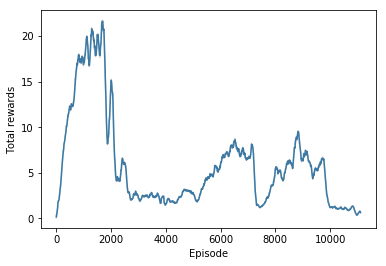

In [16]:
eps, arr = np.array(episode_total_rewards).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

In [17]:
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
# # 1 episode
# state = env.reset()
# agent.reset()
# total_reward = 0
# while True:
#     env.render()
#     action = agent.act(state)
#     state, reward, done, _ = env.step(action)
#     total_reward += reward
#     if done:
#         break
        
# print('total_reward:{}'.format(total_reward))
# env.close()